In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="~/torch_datasets", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="~/torch_datasets", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False, num_workers=4)

In [3]:
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(in_features=784, out_features=128)
        self.encoder_output_layer = nn.Linear(in_features=128, out_features=32)
        self.decoder_hidden_layer = nn.Linear(in_features=32, out_features=128)
        self.decoder_output_layer = nn.Linear(in_features=128, out_features=784)

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.sigmoid(activation)
        code = self.encoder_output_layer(activation)
        code = torch.sigmoid(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.sigmoid(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.sigmoid(activation)
        return reconstructed

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AE().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [5]:
epochs=50

In [6]:
total_loss=[]
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        batch_features = batch_features.view(-1, 784).to(device)
        
        optimizer.zero_grad()
        
        outputs = model(batch_features)
        train_loss = criterion(outputs, batch_features)
        train_loss.backward()
        optimizer.step()     
        loss += train_loss.item()    
    loss = loss / len(train_loader)
    total_loss.append(loss)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/50, loss = 0.061315
epoch : 2/50, loss = 0.036558
epoch : 3/50, loss = 0.026292
epoch : 4/50, loss = 0.021204
epoch : 5/50, loss = 0.018131
epoch : 6/50, loss = 0.015934
epoch : 7/50, loss = 0.014477
epoch : 8/50, loss = 0.013304
epoch : 9/50, loss = 0.012546
epoch : 10/50, loss = 0.011847
epoch : 11/50, loss = 0.011264
epoch : 12/50, loss = 0.010819
epoch : 13/50, loss = 0.010340
epoch : 14/50, loss = 0.009977
epoch : 15/50, loss = 0.009715
epoch : 16/50, loss = 0.009372
epoch : 17/50, loss = 0.009179
epoch : 18/50, loss = 0.008953
epoch : 19/50, loss = 0.008758
epoch : 20/50, loss = 0.008532
epoch : 21/50, loss = 0.008381
epoch : 22/50, loss = 0.008234
epoch : 23/50, loss = 0.008137
epoch : 24/50, loss = 0.007937
epoch : 25/50, loss = 0.007826
epoch : 26/50, loss = 0.007702
epoch : 27/50, loss = 0.007611
epoch : 28/50, loss = 0.007620
epoch : 29/50, loss = 0.007408
epoch : 30/50, loss = 0.007350
epoch : 31/50, loss = 0.007294
epoch : 32/50, loss = 0.007245
epoch : 33/50, lo

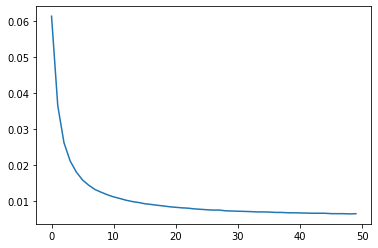

In [7]:
plt.plot(total_loss)
plt.show()

In [8]:
def show_torch_image(torch_tensor):
    plt.imshow(torch_tensor.numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [9]:
model.eval()
predictions = []

for batch_features, _ in test_loader:
    batch_features = batch_features.view(-1, 784).to(device)
    pred = model(batch_features)       
    for prediction in pred:
        predictions.append(prediction)
            
        
        
len(predictions)   

10000

In [17]:
predictions[0].shape

torch.Size([784])

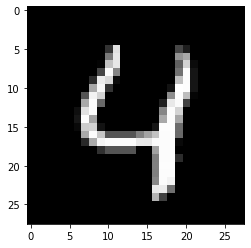

In [10]:
# Real Image
show_torch_image(test_dataset[4][0])

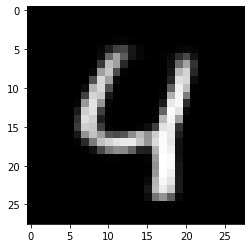

In [11]:
# generated image
show_torch_image(predictions[4].detach())